<a href="https://colab.research.google.com/github/MonikaGost/Winc/blob/master/Module5_Assignment_SharkAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas.io.formats.info import DataFrameInfo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I could not read this data file in, so searched on Stackoverflow and found this:
#(https://stackoverflow.com/questions/62684159/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python-utf-8-codec-ca)
# I tried "encoding: 'cp1252'".Seems it works.

df = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/attacks.csv", encoding ='cp1252')

Inspecting the data set

In [ ]:
df
#df.shape
#df.head()
#df.tail()
#df.sample(10)

# I see there are a lot of NaN's and a lot of columns. So I want to get rid off some of them.
# I start with columns

Cleaning up the data set

In [ ]:
# I check first which columns are relevant to answer below questions :
# 1 What are the most dangerous types of sharks to humans?
# 2 Are children more likely to be attacked by sharks?
# 3 Are shark attacks where sharks were provoked more or less dangerous?
# 4 Are certain activities more likely to result in a shark attack?
df.head(5)
list(df)

* dropping columns

In [2]:
# I get rid off the biggest chunk of irrelevant columns using loc:
df1 = df.loc[:,"Case Number":"Species "]

#df1 # >>> I see there are still some columns i don't need so i remove these as well:
list (df1)
df1.drop(columns=["Case Number","Date","Year","Country", "Area","Name","Sex ","Location", "Time"],inplace=True)

#display(df2) #>>> I don't like the spaces in columns' names so I correct that:
#list (df2)
df1.rename(columns={"Fatal (Y/N)":"Fatal","Species ":"Species"}, inplace=True)
df1
# I have seen some rows with missing data in all columns, will remove these.

,Type,Activity,Age,Injury,Fatal,Species
0,Boating,Paddling,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,Unprovoked,Standing,11,Minor injury to left thigh,N,NaN
2,Invalid,Surfing,48,Injury to left lower leg from surfboard skeg,N,NaN
3,Unprovoked,Surfing,NaN,Minor injury to lower leg,N,2 m shark
4,Provoked,Free diving,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN


* dropping rows

In [3]:
df1.shape # We have 25723 rows and 6 columns
df2 = df1.dropna(how="all")
df2.shape # we have 6302 rows left


(6302, 6)

* Looking at default missing values

In [21]:
df2.isnull().sum()

Type           0
Activity     544
Age         2831
Injury        28
Fatal        539
Species     2838
dtype: int64

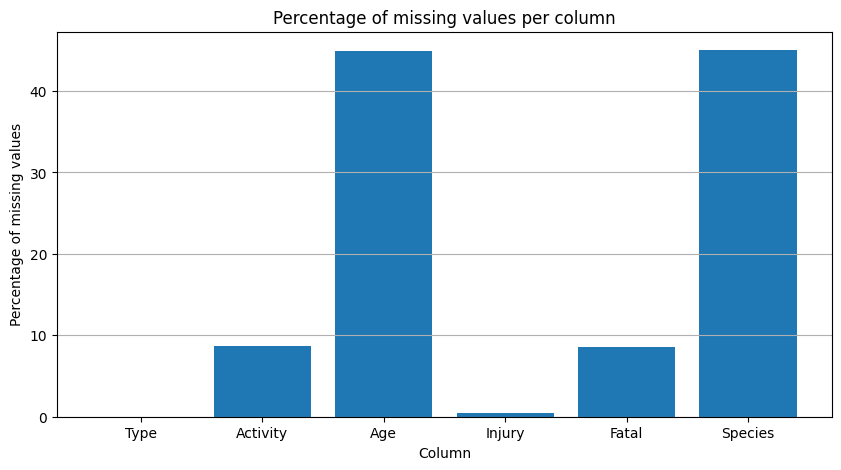

In [ ]:
#I make an overview of that.
fig, ax = plt.subplots()

x = df2.columns
percent_missing = df2.isnull().mean() * 100

ax.bar(x, percent_missing)

plt.xlabel("Column")
plt.ylabel("Percentage of missing values")
plt.title("Percentage of missing values per column")

ax.grid(True, axis="y")
fig.set_size_inches(10,5) # Make chart a little bigger

plt.show()

* Checking for non-default missing values

In [4]:
# Looking at unique values
def unique(db):
  unv = {}
  for col in db:
    uv = len(list(db.loc[:,col].unique()))
    unv[col] =  uv
  print (unv)

unique (df2)
# A lot of unique values in most of the columns. I am courious about the columns with least unique values: "Type" and "Fatal_(Y/N)".
# Will work on these first as that seems the easiest to handle.

{'Type': 9, 'Activity': 1533, 'Age': 158, 'Injury': 3738, 'Fatal': 9, 'Species': 1550}


  
  * - Analyzing values per column




Codes

In [5]:
# I will need these more often:

def unique_values(df,column_name):
  unique_values = df[column_name].unique()
  print(f'* Number of unique values in column \'{column_name}\': {len(unique_values)}\n')
  if len(unique_values)<150:
      print(f'* List of unique values in column \'{column_name}\':')
      try:
        sorted = np.sort(unique_values)
        print(" - Values are sorted")
        display(list(sorted))
      except:
        print(" ! Could not sort values !")
        display(list(unique_values))
  print('\n')

def cast_to_type(df,column_name, maybe_type):
  print("* Trying to cast to assumed type:")
  try:
    df[column_name].astype(maybe_type,errors="ignore")
    print(f"Casting to {maybe_type} was successful\n")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}\n")

def look_at_edges(df, column_name):
  print("* Sorting and looking at the edges")
  def show_head_and_tail(values):
      num_items_to_slice = 20
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])
  column = df[column_name]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print(" - Unique values sorted, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      print(f" - Could not sort values: {error}")
      print(" - Trying filtering NULL values and then sorting")
      non_null_uniques = df.loc[~df[column_name].isnull(), column_name].unique()
      sorted = np.sort(non_null_uniques)
      show_head_and_tail(sorted)
  print("\n")

def defnullv(df, column_name):
    nulls = df.loc[df[column_name].isnull()]
    print(f"* Number of default null values in column \"{column_name}\": {len(nulls)}\n")
    if len(nulls)<=15 and len(nulls)!=0:
      print(f"* View on the table filtered by Null values in \"{column_name}\":")
      print(nulls)
    elif len(nulls)==0:
      print("There are no more missing values found in this column.")

def replace_value(df, column_name, missing_old, missing_new):
    df[column_name] = df[column_name].replace({missing_old: missing_new})

def column_analysis(df,column_name,maybe_type):
    column = df[column_name]
    print(f"*** Inspecting column \'{column_name}\' *** \n")
    print(f"Column \"{column_name}\" has datatype: {df.dtypes[column_name]}\n")
    unique_values(df,column_name)
    look_at_edges(df,column_name)
    cast_to_type(df,column_name,maybe_type)
    print("* Looking at frequency: ")
    display(df[column_name].value_counts(dropna=False))
    print("\n")
    defnullv(df,column_name)


Analyse and cleaning up columns:

* Column "Type" (1/6)

In [ ]:
column_analysis(df2,"Type",'string')


In [ ]:
# Column "Type" cleaning:
# Most of NaN values look like not provoked but we are not sure, so just change it to Invalid, 4 cases do not make that much difference here.
df2["Type"]=df2.loc[:,"Type"].fillna('Invalid')
# Trying to categorize some of the values for the needs of analysis:
replace_value(df2,"Type","Sea Disaster","Unprovoked") # looks like "unprovoked" to me
replace_value(df2,"Type","Boat","Boating")
replace_value(df2,"Type","Boatomg","Boating")

#Further I am courious about value "Invalid". I take a look:
#df2[df2["Type"]=="Invalid"].sample(10)
#It seems "Ivalid" says that record are invalid, there are many values missing
#or shark involvement is questionable or not confirmed. I decide to make new database with removed Invalid record as they seem not to have any value to analysis we make.

df3 = df2[df2.loc[:,"Type"] != "Invalid"].copy()

df3.shape # there are 5751 rows left

* Column "Fatal" (2/6)

In [ ]:
column_analysis(df3,"Fatal","string")

In [37]:
# Column: 'Fatal'

#Removing empty spaces and replacing some values:
replace_value(df3,'Fatal'," N","N")
replace_value(df3,'Fatal',"N ","N")
replace_value(df3,'Fatal',"y","Y")
replace_value(df3,'Fatal',np.nan,"UNKNOWN")
#checking how can I change values "2017" and "M":
#df3[df3["Fatal"]=="2017"]
replace_value(df3,'Fatal',"2017","N")
#df3[df3["Fatal"]=="M"]
replace_value(df3,'Fatal',"M","N")

#Looking at Null values:
#df3.loc[df3["Fatal"].isna()]
# I see word "FATAL" and "No injury" in neighbour column "Injury". I want to fill empty values in column 'Fatal' depending on these but let's work first on column "Injury".

* Column "Injury" (3/6)

In [ ]:
column_analysis(df3,"Injury","string")

In [39]:
# Replacing some values to group them better:

#[df3["Injury"].value_counts(dropna=False)[:50]]
replace_value(df3,'Injury',np.nan,'No details')
replace_value(df3,'Injury',None, 'No details') # I change null to string to be able to work with str.contains, otherwise boolean masking does not work.
replace_value(df3,'Injury','unknown','No details')
replace_value(df3,'Injury','No injury, board bitten','No injury')
replace_value(df3,'Injury','FATAL, body not recovered','FATAL')
replace_value(df3,'Injury','FATAL ','FATAL')
replace_value(df3,'Injury','Minor injuries','Minor injury')
replace_value(df3,'Injury','No injury to occupants','No injury')
replace_value(df3,'Injury','No injury, surfboard bitten','No injury')
replace_value(df3,'Injury','No injury, shark bit surfboard','No injury')
replace_value(df3,'Injury','No injury, kayak bitten','No injury')
replace_value(df3,'Injury','FATAL, leg severed ','FATAL')
replace_value(df3,'Injury','FATAL, legs bitten ','FATAL')
replace_value(df3,'Injury','No injury, ski bitten','No injury')


#inspeting Null values
#df3["Injury"].isnull().sum()

# Now, as mentioned before, I want to use the data from Injury column to fill in some missing data in column "Fatal".
df3.loc[df3["Injury"].str.contains("FATAL"),"Fatal"] = "Y"
df3.loc[df3["Injury"].str.contains("No injury"),"Fatal"] = "N"
#df3[df3["Injury"].str.contains("FATAL")] # looks it worked

* Column "Activity" (4/6)

In [64]:
column_analysis(df3,"Activity","string")

*** Inspecting column 'Activity' *** 

Column "Activity" has datatype: object

* Number of unique values in column 'Activity': 1362



* Sorting and looking at the edges
 - Could not sort values: '<' not supported between instances of 'NoneType' and 'str'
 - Trying filtering NULL values and then sorting


['"boat accident"',
 '"climbing up to ship after repairing the stern in water"',
 '"crossing the river"',
 '"flying tiger" transport plane went down with 5 men onboard',
 '"riding waves on a board"',
 '"swimming vigorously"',
 '13 men in the water after sailboat capsized & sank',
 '14 m prawn trawler new venture capsized  & sank in heavy seas three people in the water',
 '1446-ton norwegian barque errol, bound from peru to newcastle with 22 on board wrecked. survivors shelterd on the wreck of the annasona. subsequently the master, his wife & 4 children perished along with several crew. survivors (5) were rescued 7/12/1909',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 '17 maldivians adrift in open boat for 31 days',
 '2 boats capsized',
 '2 messboys (jeppsen) & tony latona (13) were playing on the afterdeck of the danish ship grete maersk. jeppsen fell overboard, latona threw a lifebelt then jumped in to help hi

['wreck of  large double sailing canoe',
 'wreck of the 1308-ton norwegian ship auckland',
 'wreck of the 150-ton brig maria',
 'wreck of the 1689-ton portuguese  coaster angoche',
 'wreck of the aphrodite',
 'wreck of the schooner driver',
 'wreck of the schooner pohoiki',
 'wreck of the sovereign',
 'wreck of the state oil company ship permina',
 'wreck of the steamship birkenhead',
 'wreck of the steamship sultan of bombay',
 'wreck of the storm king',
 'wreck of the tug magellan',
 'wreck of the tweed',
 'wreck of the union steamship company 982-ton iron steamer kafir',
 'wreck of the uss somers',
 'yacht of michael howell capsized',
 'yacht race',
 'yachting accident',
 'yachtsman in a zodiac']



* Trying to cast to assumed type:
Casting to string was successful

* Looking at frequency: 


surfing                                                                                                                                                 935
swimming                                                                                                                                                820
None                                                                                                                                                    425
fishing                                                                                                                                                 421
spearfishing                                                                                                                                            313
                                                                                                                                                       ... 
picking up shark by the tail                                    



* Number of default null values in column "Activity": 425



In [ ]:
df3["Activity"] = df3.loc[:,"Activity"].str.strip().str.lower()
replace_value(df3,"Activity",'',None)
replace_value(df3,"Activity",'.',None)
replace_value(df3,"Activity",np.nan,None)
replace_value(df3,"Activity","freediving","free diving")

[df3["Activity"].value_counts(dropna=False)[:50]]

df3[df3["Activity"].isnull()] # I think i leave null values ase they are

* Column "Age" (5/6)

In [44]:
column_analysis(df3,"Age",int)

*** Inspecting column 'Age' *** 

Column "Age" has datatype: object

* Number of unique values in column 'Age': 3

* List of unique values in column 'Age':
 ! Could not sort values !


['adult', 'child', nan]



* Sorting and looking at the edges
 - Could not sort values: '<' not supported between instances of 'float' and 'str'
 - Trying filtering NULL values and then sorting


['adult', 'child']

['adult', 'child']



* Trying to cast to assumed type:
Casting to <class 'int'> was successful

* Looking at frequency: 


NaN      2519
adult    2455
child     777
Name: Age, dtype: int64



* Number of default null values in column "Age": 2519



In [43]:
#I replace some values i think is needed. Null values are of the correct type NaN.
df3["Age"] = df3.loc[:,"Age"].str.strip()
replace_value(df3,"Age",' ', 'np.nan')
replace_value(df3,"Age",'.', 'np.nan')
replace_value(df3,"Age",'', 'np.nan')
replace_value(df3,"Age",'nan', 'np.nan')
replace_value(df3,"Age",'"middle-age"','35')
replace_value(df3,"Age",'"young"','30')
replace_value(df3,"Age",'(adult)','30')
replace_value(df3,"Age",'10 or 12','11')
replace_value(df3,"Age",'12 or 13','12')
replace_value(df3,"Age",'13 or 14','13')
replace_value(df3,"Age",'13 or 18','15')
replace_value(df3,"Age",'9 & 12','10')
replace_value(df3,"Age",'9 or 10','10')
replace_value(df3,"Age",'9 months','1')
replace_value(df3,"Age",'18 months','2')
replace_value(df3,"Age",'>50','55')
replace_value(df3,"Age",'?    &   14','14')
replace_value(df3,"Age",'A.M','np.nan')
replace_value(df3,"Age",'Both 11','11')
replace_value(df3,"Age",'Elderly','60')
replace_value(df3,"Age",'F','np.nan')
replace_value(df3,"Age",'MAKE LINE GREEN', 'np.nan')
replace_value(df3,"Age",'Teens','10')
replace_value(df3,"Age",'teen','10')
replace_value(df3,"Age",'Teen','10')
replace_value(df3,"Age",'X','np.nan')
replace_value(df3,"Age",'adult','30')
replace_value(df3,"Age",'mid-30s','35')
replace_value(df3,"Age",'young','30')
replace_value(df3,"Age",'\xa0 ','np.nan')
replace_value(df3,"Age",'20s','25')
replace_value(df3,"Age",'30s','35')
replace_value(df3,"Age",'40s','45')
replace_value(df3,"Age",'50s','50s')
replace_value(df3,"Age",'60s','60s')


#[df3["Age"].value_counts(dropna=False)[:50]]
#df3[df3["Age"].isnull()]
# looking what we have, think this data is usefull for further analysis like this
# Replacing data by categorizing age to adult and child categories for the purpose of the analysis:
df3.loc[df3["Age"] > "17", "Age"] = "adult"
df3.loc[df3["Age"] <= "17", "Age"] = "child"



* Column "Species" (5/6)

In [ ]:
column_analysis(df3,"Species",str)

In [ ]:
df3["Species"] = df3.loc[:,"Species"].str.strip().str.lower()
replace_value(df3,"Species",None, "unknown") # replacing null values with string so i can do boolean masking
df3.loc[df3["Species"].str.contains("white"),"Species"] = "white shark"
df3.loc[df3["Species"].str.contains("tiger"),"Species"] = "tiger shark"
df3.loc[df3["Species"].str.contains("bull"),"Species"] = "bull shark"
df3.loc[df3["Species"].str.contains("wobbegong"),"Species"] = "wobbegong shark"
df3.loc[df3["Species"].str.contains("zambesi"),"Species"] = "zambezi shark"
df3.loc[df3["Species"].str.contains("zambezi"),"Species"] = "zambezi shark"
df3.loc[df3["Species"].str.contains("brown"),"Species"] = "brown shark"
df3.loc[df3["Species"].str.contains("small"),"Species"] = "small shark"
df3.loc[df3["Species"].str.contains("1.5"),"Species"] = "5' shark"
df3.loc[df3["Species"].str.contains("1.8"),"Species"] = "6' shark"
df3.loc[df3["Species"].str.contains("1.2"),"Species"] = "4' shark"
df3.loc[df3["Species"].str.contains("10'"),"Species"] = "10' shark"
df3.loc[df3["Species"].str.contains("7'"),"Species"] = "7' shark"
df3.loc[df3["Species"].str.contains("12'"),"Species"] = "12' shark"
df3.loc[df3["Species"].str.contains("8'"),"Species"] = "8' shark"
df3.loc[df3["Species"].str.contains("unidentified"),"Species"] = "unknown"

[df3["Species"].value_counts(dropna=False)[:50]] # I am satisfied with this data at this point


Now the data set is cleaned up I will try to answer the questions of this assignment:
* 1 What are the most dangerous types of sharks to humans?
* 2 Are children more likely to be attacked by sharks?
* 3 Are shark attacks where sharks were provoked more or less dangerous?
* 4 Are certain activities more likely to result in a shark attack?

Ad.1 What are the most dangerous types of sharks to humans?

To answer this question I look at number of all shark attacks per type of shark. Then I check how many of these attacks were fatal and how many were not fatal.

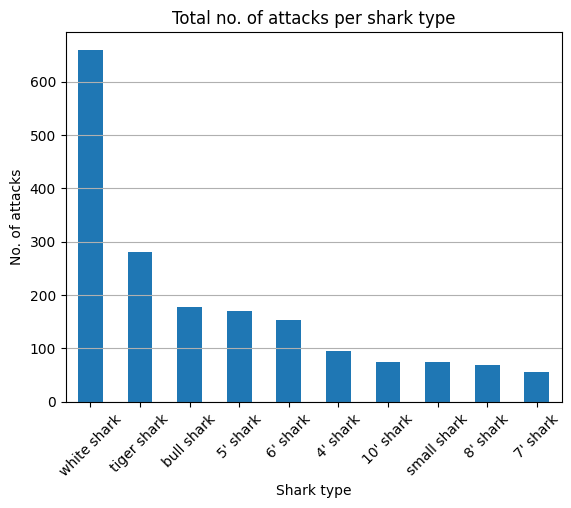

In [47]:
# I create smaller data base with the necessary data only:
most_dangerous = df3.loc[:,"Fatal":"Species"]
md= most_dangerous[(most_dangerous.Species !="unknown") & (most_dangerous.Fatal !="unknown")]

# was not sure how to make plot from value_counts,I googled it: https://www.statology.org/pandas-plot-value-counts/ :
md.value_counts("Species").head(10).plot(kind="bar")

plt.xticks(rotation=45)
plt.xlabel("Shark type")
plt.ylabel("No. of attacks")
plt.title("Total no. of attacks per shark type") # concerns the records where shark type is known
plt.grid(True, axis="y")

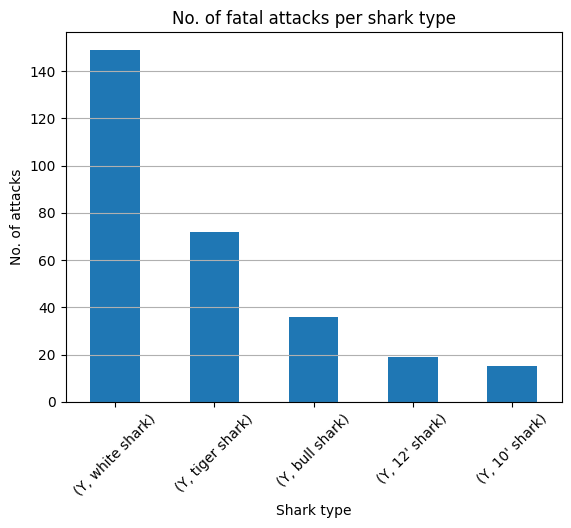

In [59]:
# Looking at fatal cases:
fatal = md.loc[md.Fatal == "Y"].value_counts().head(5) # I look further on top 5 types of sharks
fatal.plot(kind='bar')

plt.xticks(rotation=45)
plt.xlabel("Shark type")
plt.ylabel("No. of attacks")
plt.title("No. of fatal attacks per shark type")
plt.grid(True, axis="y")

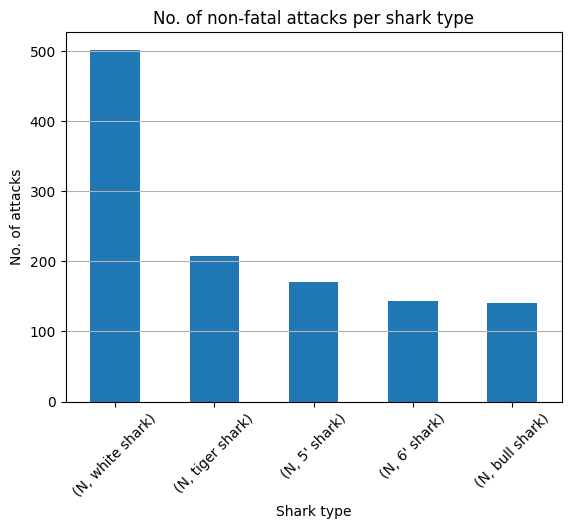

In [49]:
# Looking at non-fatal cases:
non_fatal = md.loc[md.Fatal == "N"].value_counts().head(5)
non_fatal.plot(kind='bar')

plt.xticks(rotation=45)
plt.xlabel("Shark type")
plt.ylabel("No. of attacks")
plt.title("No. of non-fatal attacks per shark type")
plt.grid(True, axis="y")

Answer question 1: There are no doubts that White shark is the most dangerous. The most cases of sharks attacks registerred concern this type of shark, also the most fatal cases are due to the White shark's involvement as well as not-fatal cases.



---

Ad.2 Are children more likely to be attacked by sharks?

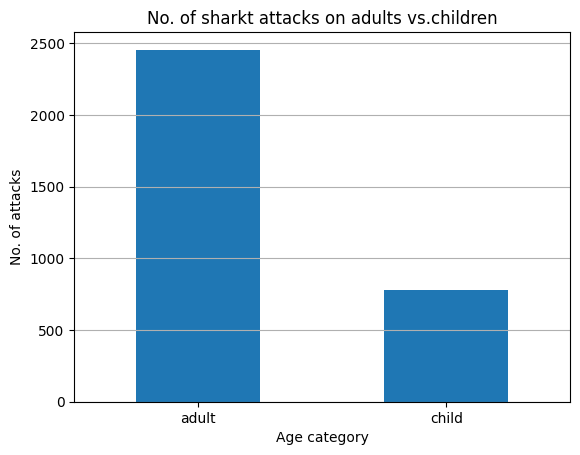

In [50]:
age = df3.dropna(subset=['Age'], how="all") # dropping rows with null values in column "Age"

(age.loc[:,"Age"].value_counts()).plot(kind="bar")

plt.xticks(rotation=0)
plt.xlabel("Age category")
plt.ylabel("No. of attacks")
plt.title("No. of sharkt attacks on adults vs.children")
plt.grid(True, axis="y")

Answer ad.2: There is no evidence that children are more likely to be attacked by sharks than adults. There are 3 times more cases registerred where adults were attacked comparing to cases where attacks involved children.

---
Ad.3 Are shark attacks where sharks were provoked more or less dangerous?

To answer this question I compare data from the columns "Fatal" and "Type". I look on how many of the attacks where provoked and not provoked and if there is a corelation between the type of attack and consequences for attacked person (are provoked attacks leading to more fatal cases than not provoked).


No_of_attacks
Type       Fatal                   
Unprovoked Not fatal           3421
           Fatal               1350
Provoked   Not fatal            551
           Fatal                 19

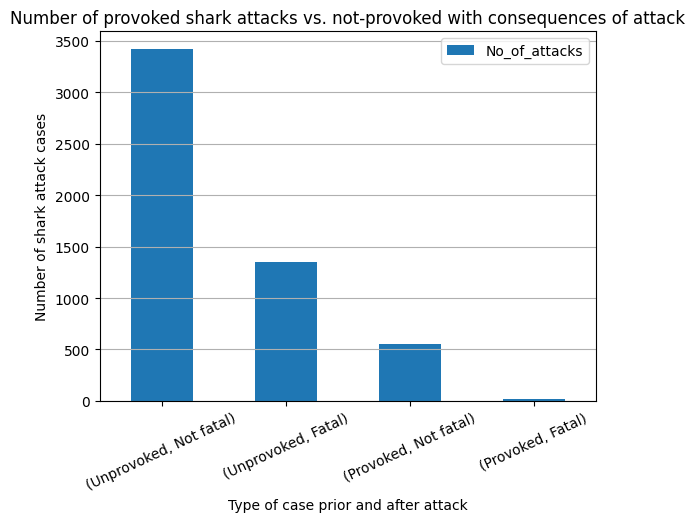

In [58]:
df4 = df3.loc[:,["Type","Fatal"]]
df4["Type"].unique()
replace_value(df4,"Type",'Boating', None)
replace_value(df4,"Type",'Questionable', None)
replace_value(df4,"Fatal",'N', "Not fatal")
replace_value(df4,"Fatal",'Y', "Fatal")

df4.dropna(inplace=True) # removing null values
df5= df4[(df4.Fatal !="UNKNOWN")] # removing rows with no data in Fatal column

# I make a data frame from value_counts:
provoked = pd.DataFrame(df5.value_counts())
#provoked
provoked.rename(columns={ 0:"No_of_attacks"}, inplace=True)


ax = provoked.plot.bar(rot=25)
plt.xlabel("Type of case prior and after attack")
plt.ylabel("Number of shark attack cases")
plt.title("Number of provoked shark attacks vs. not-provoked with consequences of attack")

ax.grid(True, axis="y")
provoked

Answer ad.3: Number of unprovoked attacks is much higher than number of provoked attacks. There seems to be no corelation between cause of attack (provoked or not) and consequnces for attacked person (fatal or not) therefore it seems provoked attacks are not more dangerous than not provoked.

---
Ad.4 Are certain activities more likely to result in a shark attack?

To answer this question I look at column "Activity" and number of registerred cases.


,Activity,% of all
surfing,935,18
swimming,820,15
fishing,421,8
spearfishing,313,6
bathing,152,3
wading,140,3
diving,117,2
standing,100,2
snorkeling,87,2
scuba diving,71,1


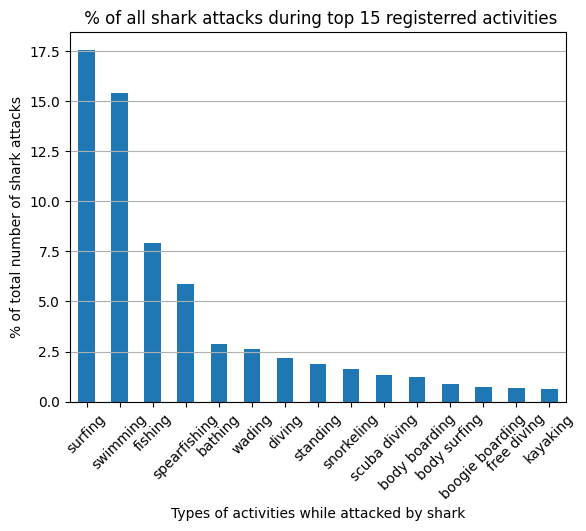

In [116]:
activities = df3.loc[:,"Activity"]
#activities
activities_final = activities.dropna(how="all") # dropping rows with empty values
#activities_final.shape # number of all cases of attacks where type of activity is known is 5326

af= pd.DataFrame(activities_final.value_counts().head(15)) # There are a lot of unique values in this columns, I take top 15 for the analysis
af["% of all"] = (af["Activity"]/5326)*100
pd.options.display.float_format = '{:.0f}'.format
display(af)

fig, ax = plt.subplots()
af.loc[:,"% of all"].plot.bar(rot=45)

plt.xlabel("Types of activities while attacked by shark")
plt.ylabel("% of total number of shark attacks")
plt.title(" % of all shark attacks during top 15 registerred activities")
ax.grid(True, axis="y")

Answer Ad.4: There are a lot of unique activities in the data file but when we look at top 15 activities it looks surfing and swimming are far above other ones with more than 10% of share in all the cases where type of activity was known. Surfing with 18% and swimming with 15% of all considerred cases seem to be most liable acitivities for a shark attack. However there are no other circumstances or factors taken into consideration in this analysis (like geographical location or presence of sharks in the region) which are certainly of the influence on the probability of shark attack.